In [1]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.io.arff import loadarff

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error

# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#import umap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
df_data = pd.read_csv('data/cleaned/Elasticsearch-0.90.11-Unified.csv')
df_data = df_data.iloc[:, 1:]
df_data

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
0,0.000000,0,0,0,0.000000,0.000000,0,0,4,0,...,7,0,6,0,7,7,0,6,0,0
1,0.310324,25,321,71,0.206629,0.294925,667,645,1,8,...,132,0,87,1,602,1322,0,349,32,0
2,1.000000,1,5,1,1.000000,1.000000,11,11,1,2,...,1,0,1,0,1,7,0,1,0,0
3,0.389344,3,13,3,0.461538,0.450980,24,23,1,4,...,2,0,1,0,2,28,0,1,0,0
4,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,0.000000,0,0,0,0.000000,0.000000,0,0,1,0,...,10,0,8,0,17,10,0,15,0,0
5904,0.000000,0,0,0,0.000000,0.000000,0,0,1,0,...,1,0,0,0,23,1,0,1,0,0
5905,0.000000,0,0,0,0.000000,0.000000,0,0,3,1,...,7,0,4,0,26,15,0,17,0,0
5906,0.000000,0,0,0,0.000000,0.000000,0,0,1,1,...,1,0,1,0,1,2,0,1,0,0


In [3]:
df_data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5908 entries, 0 to 5907
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC      5908 non-null   float64
 1   CCL     5908 non-null   int64  
 2   CCO     5908 non-null   int64  
 3   CI      5908 non-null   int64  
 4   CLC     5908 non-null   float64
 5   CLLC    5908 non-null   float64
 6   LDC     5908 non-null   int64  
 7   LLDC    5908 non-null   int64  
 8   LCOM5   5908 non-null   int64  
 9   NL      5908 non-null   int64  
 10  NLE     5908 non-null   int64  
 11  WMC     5908 non-null   int64  
 12  CBO     5908 non-null   int64  
 13  CBOI    5908 non-null   int64  
 14  NII     5908 non-null   int64  
 15  NOI     5908 non-null   int64  
 16  RFC     5908 non-null   int64  
 17  AD      5908 non-null   float64
 18  CD      5908 non-null   float64
 19  CLOC    5908 non-null   int64  
 20  DLOC    5908 non-null   int64  
 21  PDA     5908 non-null   int64  
 22  

In [4]:
df_data.describe() #shows simple statistics (min, max, mean, etc.)

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
count,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,...,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000
mean,0.129180,0.768619,3.710731,1.337678,0.112583,0.119398,12.783683,11.443297,1.738152,1.355281,...,6.921124,0.370853,5.726473,0.219025,17.368483,34.089709,2.448544,12.826676,0.574475,0.114760
std,0.275333,2.677291,26.013522,7.258735,0.253605,0.260358,54.025268,47.475775,3.351834,2.402853,...,11.653897,2.100427,10.001676,1.573792,46.134854,84.006449,6.365183,29.419594,3.071526,0.318759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,3.000000,3.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,3.000000,0.000000,3.000000,0.000000,9.000000,11.000000,0.000000,6.000000,0.000000,0.000000
75%,0.043741,1.000000,1.000000,1.000000,0.036520,0.045184,6.000000,6.000000,2.000000,2.000000,...,8.000000,0.000000,6.000000,0.000000,21.000000,33.000000,1.000000,15.000000,0.000000,0.000000
max,1.000000,54.000000,1299.000000,191.000000,1.000000,1.000000,1101.000000,1096.000000,137.000000,49.000000,...,308.000000,120.000000,212.000000,78.000000,3004.000000,2680.000000,120.000000,1812.000000,167.000000,1.000000


In [156]:
# metric correlations- (step 1)

In [5]:
df_data.corr('spearman')

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
CC,1.000000,0.976172,0.970707,0.973096,0.999006,0.999392,0.971292,0.971149,0.146795,0.300871,...,0.177094,0.016925,0.186647,-0.020050,0.161226,0.366198,0.129165,0.179930,0.110324,0.068374
CCL,0.976172,1.000000,0.992714,0.998103,0.976603,0.976867,0.992334,0.992202,0.161783,0.342776,...,0.256296,0.047935,0.258000,-0.009992,0.237329,0.444492,0.176332,0.253876,0.137223,0.097785
CCO,0.970707,0.992714,1.000000,0.993154,0.970510,0.970974,0.992022,0.992573,0.156178,0.370415,...,0.262634,0.061415,0.263351,-0.005678,0.236110,0.456712,0.175401,0.253259,0.133619,0.103799
CI,0.973096,0.998103,0.993154,1.000000,0.973732,0.973848,0.994866,0.994679,0.163098,0.343920,...,0.262889,0.049862,0.263590,-0.009496,0.247385,0.453266,0.185751,0.263200,0.146857,0.097112
CLC,0.999006,0.976603,0.970510,0.973732,1.000000,0.999704,0.972487,0.972168,0.147968,0.301568,...,0.174408,0.016398,0.183782,-0.023330,0.160558,0.367506,0.128225,0.179063,0.111775,0.070898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TNOS,0.366198,0.444492,0.456712,0.453266,0.367506,0.367020,0.463373,0.464018,0.343110,0.715699,...,0.759820,0.131239,0.714105,0.141899,0.596637,1.000000,0.208244,0.626692,0.276874,0.248921
TNPA,0.129165,0.176332,0.175401,0.185751,0.128225,0.127755,0.183861,0.183490,0.058748,0.037905,...,0.138377,0.493652,0.123730,-0.014481,0.337571,0.208244,1.000000,0.327322,0.308279,0.008140
TNPM,0.179930,0.253876,0.253259,0.263200,0.179063,0.179387,0.268336,0.268256,0.291878,0.216368,...,0.725408,0.058427,0.712274,0.196993,0.930378,0.626692,0.327322,1.000000,0.471455,0.120671
TNS,0.110324,0.137223,0.133619,0.146857,0.111775,0.110374,0.150074,0.149070,0.034620,0.048971,...,0.213652,-0.071690,0.180808,0.654132,0.464739,0.276874,0.308279,0.471455,1.000000,-0.048493


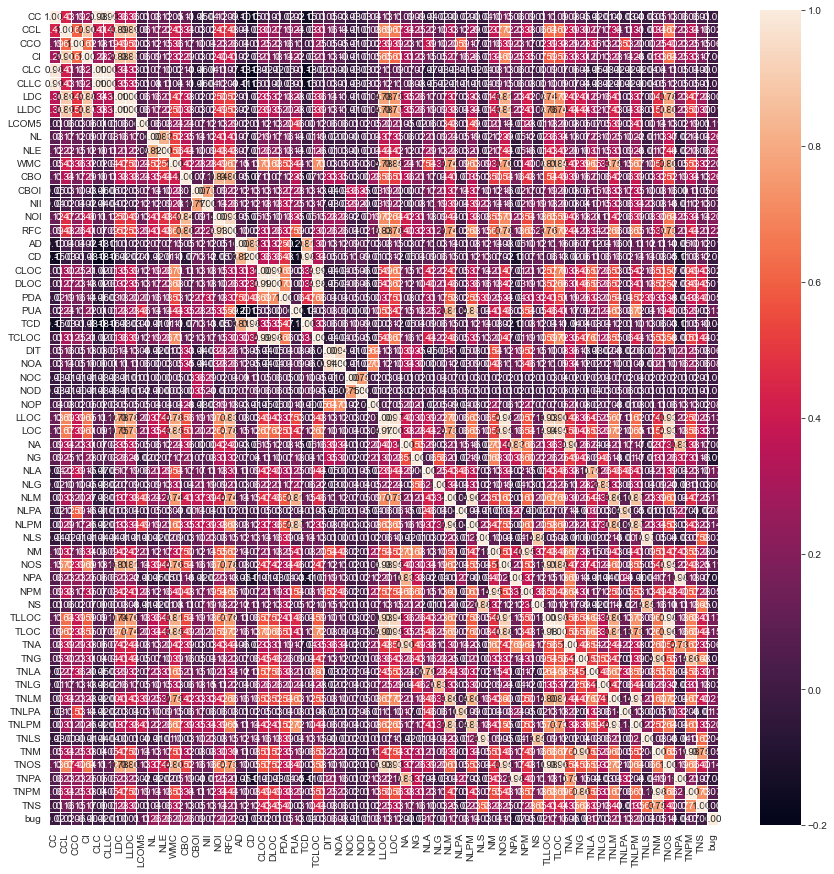

In [6]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df_data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [9]:
cor_matrix = df_data.corr('spearman').abs()

In [10]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

      CC       CCL       CCO        CI       CLC      CLLC       LDC  \
CC   NaN  0.976172  0.970707  0.973096  0.999006  0.999392  0.971292   
CCL  NaN       NaN  0.992714  0.998103  0.976603  0.976867  0.992334   
CCO  NaN       NaN       NaN  0.993154  0.970510  0.970974  0.992022   
CI   NaN       NaN       NaN       NaN  0.973732  0.973848  0.994866   
CLC  NaN       NaN       NaN       NaN       NaN  0.999704  0.972487   
...   ..       ...       ...       ...       ...       ...       ...   
TNOS NaN       NaN       NaN       NaN       NaN       NaN       NaN   
TNPA NaN       NaN       NaN       NaN       NaN       NaN       NaN   
TNPM NaN       NaN       NaN       NaN       NaN       NaN       NaN   
TNS  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
bug  NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          LLDC     LCOM5        NL  ...      TNLM     TNLPA     TNLPM  \
CC    0.971149  0.146795  0.300871  ...  0.177094  0.016925  0

In [11]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

['CCL', 'CCO', 'CI', 'CLC', 'CLLC', 'LDC', 'LLDC', 'NLE', 'WMC', 'NII', 'NOI', 'RFC', 'CD', 'CLOC', 'DLOC', 'PDA', 'TCD', 'TCLOC', 'NOA', 'NOD', 'NOP', 'LLOC', 'LOC', 'NLM', 'NLPM', 'NOS', 'NPM', 'TLLOC', 'TLOC', 'TNA', 'TNG', 'TNLA', 'TNLG', 'TNLM', 'TNLPA', 'TNLPM', 'TNLS', 'TNM', 'TNOS', 'TNPA', 'TNPM', 'TNS']


In [12]:
df_data = df_data.drop(df_data[to_drop], axis=1)

In [13]:
df_data.shape

(5908, 19)

In [12]:
# Variance inflation factor analysis  (VIF) - setp 2

In [14]:
def vif(features):

    # Prepare a dataframe for VIF
    X_VIF = add_constant(features)

    # Simulate a multicollinearity situation of AddedLOC, A, and B
    #X_VIF['A'] = [2 * x_i + random.random() for x_i in X_VIF['AddedLOC']]
    #X_VIF['B'] = [3 * x_i + random.random() for x_i in X_VIF['AddedLOC']]

    # Calculate VIF scores
    vif_scores = pd.DataFrame([variance_inflation_factor(X_VIF.values, i) 
                   for i in range(X_VIF.shape[1])], 
                  index=X_VIF.columns)
    # Prepare a final dataframe of VIF scores
    vif_scores.reset_index(inplace = True)
    vif_scores.columns = ['Feature', 'VIFscore']
    vif_scores = vif_scores.loc[vif_scores['Feature'] != 'const', :]
    vif_scores = vif_scores.sort_values(by = ['VIFscore'], ascending = False)
    return vif_scores

In [15]:
X = df_data.iloc[:, 0:-1]
y = df_data["bug"]

#y = df_data.pop('Defective')
#X = df_data

print("X:", X.shape)
print("y:", y.shape)

X: (5908, 18)
y: (5908,)


In [16]:
vif(X)

,Feature,VIFscore
10,NA,16.514231
17,NPA,9.283306
16,NM,9.028242
18,NS,8.335128
15,NLS,7.418005
11,NG,5.643207
12,NLA,3.864650
13,NLG,3.081954
7,PUA,2.687675
14,NLPA,2.099985


In [ ]:
#Drop NA

In [17]:
X= X.drop(labels='NA',axis='columns')

In [18]:
X.columns

Index(['CC', 'LCOM5', 'NL', 'CBO', 'CBOI', 'AD', 'PUA', 'DIT', 'NOC', 'NG',
       'NLA', 'NLG', 'NLPA', 'NLS', 'NM', 'NPA', 'NS'],
      dtype='object')

In [19]:
vif(X)

,Feature,VIFscore
17,NS,8.226850
14,NLS,7.247525
15,NM,6.446526
10,NG,5.639107
12,NLG,3.081359
7,PUA,2.372653
4,CBO,1.667836
11,NLA,1.647259
8,DIT,1.584429
16,NPA,1.542436


In [20]:
X= X.drop(labels='NS',axis='columns')

In [21]:
vif(X)

,Feature,VIFscore
15,NM,5.741277
10,NG,5.529543
12,NLG,3.037359
7,PUA,2.324300
4,CBO,1.661977
11,NLA,1.634115
8,DIT,1.571246
16,NPA,1.542091
13,NLPA,1.517962
5,CBOI,1.395713


In [22]:
X= X.drop(labels='NM',axis='columns')

In [23]:
vif(X)

,Feature,VIFscore
10,NG,2.422631
12,NLG,2.004657
7,PUA,1.864669
11,NLA,1.569376
4,CBO,1.552259
15,NPA,1.517943
13,NLPA,1.500791
5,CBOI,1.390259
8,DIT,1.388672
2,LCOM5,1.357187


In [ ]:
#resampling

Classes: [0, 1]
Counts: [5230, 678]


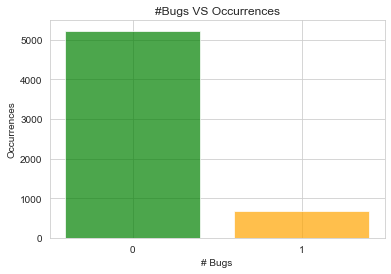

In [24]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [19]:
#oversampling using SMOTE up to 30%

In [25]:
from imblearn.over_sampling import SMOTE
X_train_over_sampled, y_train_over_sampled = SMOTE(sampling_strategy=0.3).fit_resample(X, y)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape)

Train: (6799, 15) (6799,)


Classes: [0, 1]
Counts: [5230, 1569]


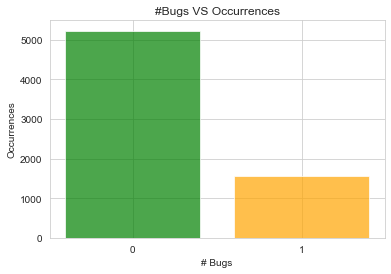

In [26]:
unique, counts = np.unique(y_train_over_sampled, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [27]:
bugs= y_train_over_sampled.groupby(y_train_over_sampled)
bugs.size()

bug
0    5230
1    1569
Name: bug, dtype: int64

In [28]:
data = pd.concat([X_train_over_sampled, y_train_over_sampled], axis=1)

In [29]:
data

,CC,LCOM5,NL,CBO,CBOI,AD,PUA,DIT,NOC,NG,NLA,NLG,NLPA,NLS,NPA,bug
0,0.000000,4,0,0,4,0.714286,2,0,0,2,0,2,0,0,0,0
1,0.310324,1,8,36,23,1.000000,0,0,0,3,10,3,0,0,0,0
2,1.000000,1,2,0,0,0.000000,2,0,0,0,0,0,0,0,0,0
3,0.389344,1,4,5,1,0.000000,2,1,0,0,6,0,0,0,0,0
4,0.000000,0,0,0,18,1.000000,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6794,0.000000,2,2,5,1,0.038956,11,0,0,0,6,0,0,0,0,1
6795,0.109316,4,2,17,48,0.760807,10,2,0,1,12,0,0,0,0,1
6796,0.000000,0,0,0,8,0.740103,0,0,2,0,0,0,0,0,0,1
6797,0.000000,1,0,1,0,0.000000,2,0,0,0,0,0,0,0,0,1


In [30]:
# save the dataset for c5
filename = 'Elasticsearch-0.90.11-Unified.csv'
data.to_csv('data/cleaned/expr1/{}'.format(filename),sep=',')

In [174]:
# Model Construction

In [31]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape,
      "Test:", X_test_over_sampled.shape, y_test_over_sampled.shape,
      "Cross Validation", X_cv_over_sampled.shape, y_cv_over_sampled.shape)


Train: (4759, 15) (4759,) Test: (1020, 15) (1020,) Cross Validation (1020, 15) (1020,)


In [32]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=False, n_jobs=True, pca=False):
    
    if scale & pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")
        
    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])
        
    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])
        
    grid = GridSearchCV(pipeline, param_grid = params, cv=5, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)
    
    best_prameters = {}
    for k, v in grid.best_params_.items():
        best_prameters[k[5:]] = v

    if n_jobs:
        model = model(**best_prameters, n_jobs=4)
    else:
        model = model(**best_prameters)
   
    model.fit(X_train, y_train)
    
    print("Best Parameters for model:", best_prameters)

    return {
        "model": model, 
        "best_params":best_prameters
    }

In [33]:
# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
    y_val = np.reshape(y_val, -1).astype(np.int32)
    y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred,labels=[0,1]).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    auc = roc_auc_score(y_val, y_pred)
    print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [34]:
def model_eval(model, X_test, y_test, acc=True, recall_=True, auc_=True, plot_conf=True, plot_auc=True, f1=True, prop=False):
    
    res = [None, None, None, None] # Accuracy, auc_roc, f1_score, recall
    y_pred = model.predict(X_test)
    
    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)
    
    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc
        
    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('accuracy:', res[0] * 100 ,'%')
              
    if recall_:
        res[3]= recall_score(y_test, y_pred, average='macro')
        print('recall:', res[3] * 100 ,'%')
              
    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)
              
        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
        print('ROC:', res[1] * 100 ,'%')
              
    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');
    
    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]
        
        #n_classes = (0, 1)
        
        for i in range(0,1):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            
        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC");
        plt.legend()

    return res

In [35]:
scores = {}

In [85]:
# classifiers after removing multi columnary and over sampling

In [36]:
# AdaBoostClassifier
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, ada_params, scale=False, n_jobs=False)

Best Parameters for model: {'learning_rate': 0.1, 'n_estimators': 100}


accuracy: 81.07843137254902 %
recall: 62.84021756091036 %
ROC: 62.840217560910375 %


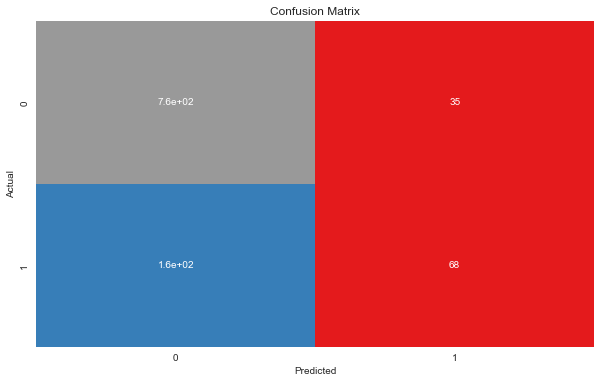

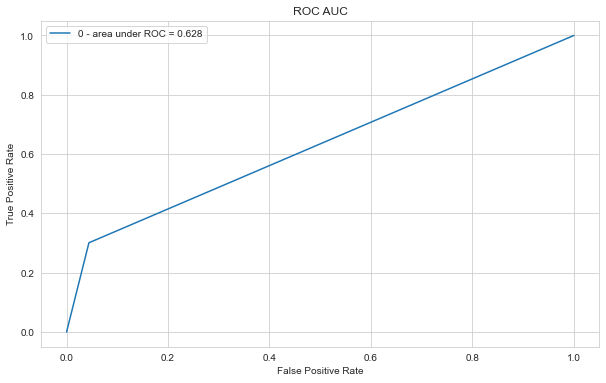

In [37]:
model_scoring = model_eval(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

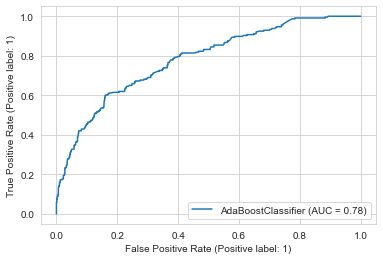

In [38]:
ROC_curve = plot_roc_curve(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
#xgboost

In [39]:

xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

[17:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.9}


accuracy: 86.9607843137255 %
recall: 77.3806870109895 %
ROC: 77.3806870109895 %


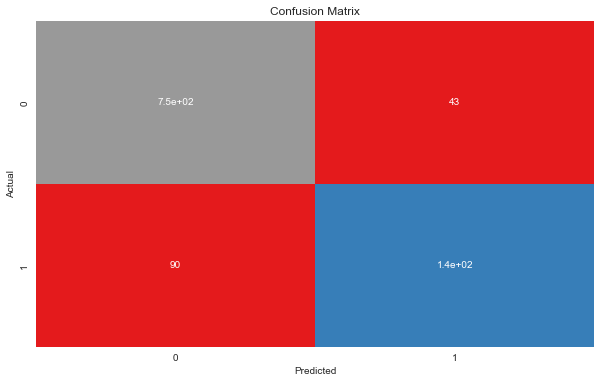

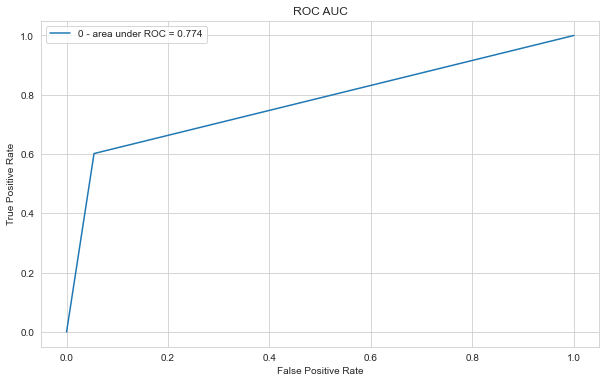

In [40]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

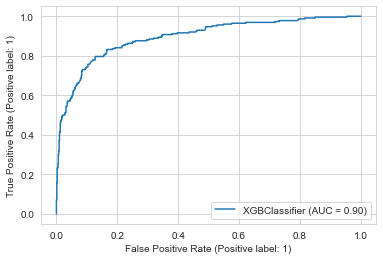

In [41]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [42]:
rfc_params = {
    'clf__n_estimators'      : [200, 500],
    'clf__max_depth'         : [10, 20],
    'clf__max_features': [1.0, 0.7, 0.4],
    'clf__criterion' :['gini', 'entropy']
}

rfc = Modeler(RandomForestClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, rfc_params, scale=False) 

Best Parameters for model: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 0.4, 'n_estimators': 200}


accuracy: 87.45098039215686 %
recall: 78.17034840953167 %
ROC: 78.17034840953167 %


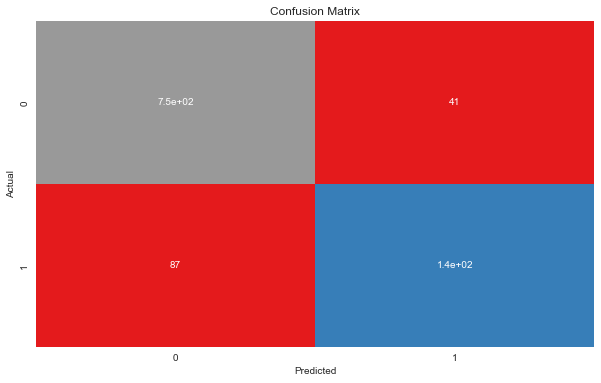

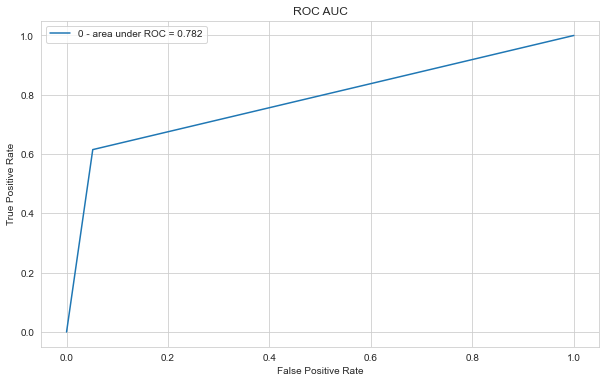

In [44]:
model_scoring = model_eval(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

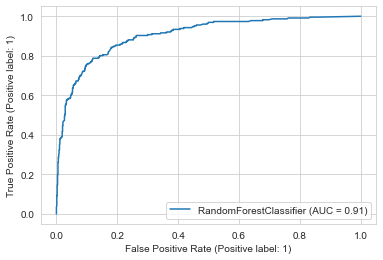

In [45]:
ROC_curve = plot_roc_curve(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [46]:

# SVC()
svc_params = {
    'clf__C': [0.1, 1],
    #'linear'
    'clf__kernel': ['rbf'],
    'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, svc_params, scale=False, n_jobs=False)

Best Parameters for model: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


accuracy: 81.96078431372548 %
recall: 63.881768128218276 %
ROC: 63.88176812821826 %


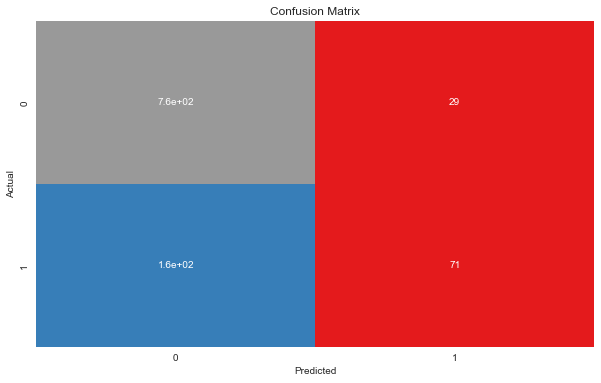

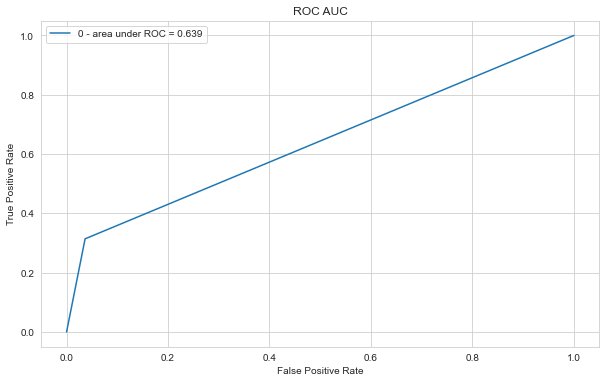

In [47]:
model_scoring = model_eval(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

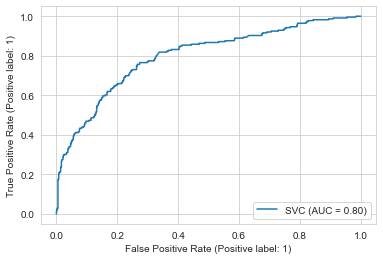

In [48]:
ROC_curve = plot_roc_curve(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# naive_bayes

In [49]:
naive_bayes = Modeler(GaussianNB, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 78.03921568627452 %
recall: 61.83767637814584 %
ROC: 61.83767637814584 %


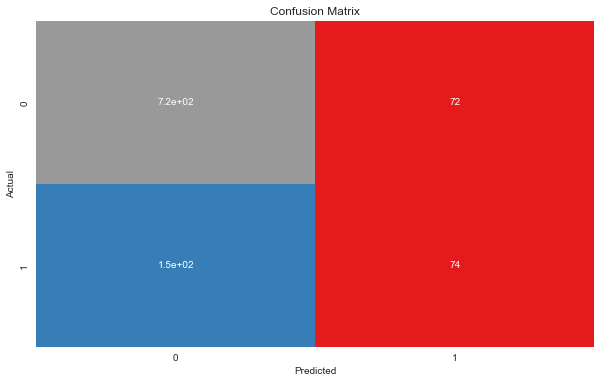

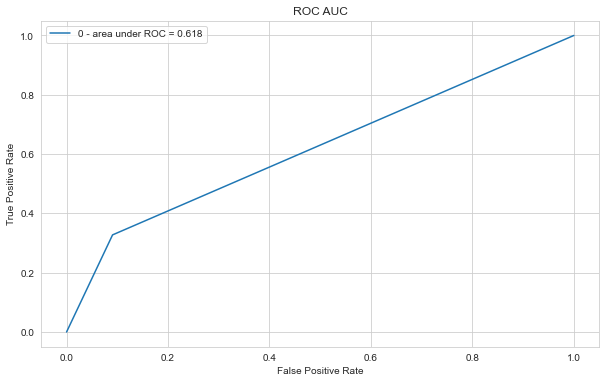

In [50]:
model_scoring = model_eval(naive_bayes["model"], X_test_over_sampled, y_test_over_sampled)
scores["Naive Bayes | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

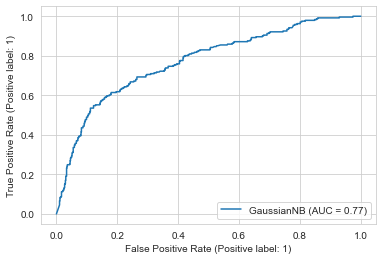

In [51]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv_over_sampled, y_cv_over_sampled)
scores["Naive Bayes | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# Model Evaluation Comparision

In [52]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('AUC', ascending=False)

In [53]:
score_df

,Accuracy,ROC,F1-Score,Recall-Score,AUC
Random Forest | Binary,87.45,78.17,80.32,78.17,90.54
XGBoost | Binary,86.96,77.38,79.51,77.38,89.54
Support-Vector Machine | Binary,81.96,63.88,66.41,63.88,79.82
AdaBoost Classifier | Binary,81.08,62.84,65.03,62.84,77.97
Naive Bayes | Binary,78.04,61.84,63.18,61.84,77.02
